In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error
from sktime.performance_metrics.forecasting import MeanAbsoluteScaledError

In [2]:
pair_features = pd.read_csv("Data/pair_features1_300_60.csv")

In [3]:
pair_features = pair_features.dropna()
pair_features

,Date,Ticker_P1,Close_P1,Ticker_P2,Close_P2,High_P1,High_P2,Low_P1,Low_P2,Volume_P1,...,abs_spread_normed_max,abs_spread_normed_90th,abs_spread_normed_75th,abs_spread_normed_median,abs_spread_normed_l7_avg,abs_spread_normed_l14_avg,cos_sim,corr_coef,pnls,num_entries
598,2017-05-18,CAG,30.320442,NOC,220.838577,37.910000,248.990005,37.549999,243.389999,1873300.0,...,2.975717,2.270699,1.895705,1.527464,1.576306,1.586909,0.999049,0.807134,0.084844,1.0
599,2017-05-19,CAG,30.352636,NOC,223.522141,37.919998,250.380005,37.549999,247.600006,2315700.0,...,2.975717,2.270699,1.895705,1.534274,1.586121,1.607330,0.999044,0.804036,0.085424,1.0
600,2017-05-22,CAG,30.626219,NOC,223.137421,38.139999,254.000000,37.650002,249.410004,2596500.0,...,2.975717,2.270699,1.895705,1.541409,1.593882,1.618395,0.999043,0.801516,-0.076062,1.0
601,2017-05-23,CAG,30.883720,NOC,224.210846,38.599998,251.449997,38.029999,248.580002,2263200.0,...,2.975717,2.270699,1.895705,1.541409,1.610850,1.632208,0.999042,0.799516,-0.074628,1.0
602,2017-05-24,CAG,31.012472,NOC,226.652908,38.720001,253.580002,38.500000,251.000000,1837100.0,...,2.975717,2.270699,1.895705,1.541409,1.648063,1.657103,0.999039,0.797200,0.078426,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256935,2019-09-27,TEL,85.735382,MAS,38.672371,93.980003,41.820000,92.470001,41.099998,638600.0,...,2.162576,1.720455,1.385796,0.863278,0.767878,0.937990,0.998680,0.878890,0.000000,0.0
1256936,2019-09-30,TEL,86.169998,MAS,38.672371,93.809998,41.980000,92.949997,41.340000,1156800.0,...,2.162576,1.720455,1.385796,0.863278,0.705360,0.904559,0.998678,0.879328,0.000000,0.0
1256937,2019-10-01,TEL,84.644150,MAS,38.987839,94.279999,43.160000,91.500000,42.009998,1172600.0,...,2.162576,1.720455,1.385796,0.863278,0.601366,0.845879,0.998670,0.879403,0.000000,0.0
1256938,2019-10-02,TEL,82.313721,MAS,37.957928,91.260002,41.750000,88.349998,40.470001,1380800.0,...,2.162576,1.720455,1.385796,0.863278,0.534651,0.764843,0.998664,0.879423,0.000000,0.0


In [4]:
features_names = ['Close_P1', 'Close_P2', 'cos_sim', 'corr_coef',
       'abs_spread_normed_max', 'abs_spread_normed_90th',
       'abs_spread_normed_75th', 'abs_spread_normed_median',
       'abs_spread_normed_l7_avg', 'abs_spread_normed_l14_avg']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(pair_features[features_names], pair_features['pnls'], test_size=0.2, random_state=42)

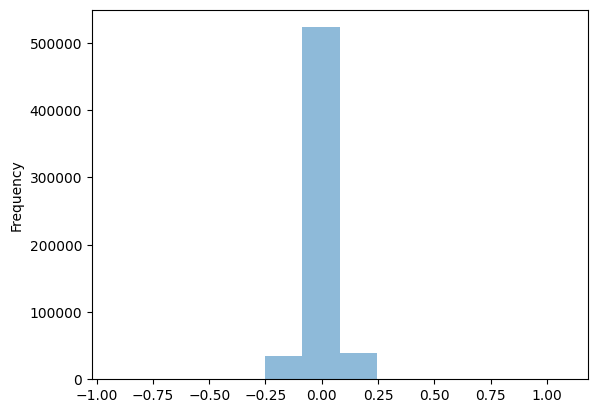

In [6]:
ax = pair_features['pnls'].plot.hist(bins=12, alpha=0.5)

In [9]:
# Initialize and train the Linear Regression
model = LinearRegression().fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

y_test.reset_index(drop=True, inplace=True)

mase = abs(np.mean([abs(y_test[i] - y_pred[i]) / (abs(y_test[i] - y_test[i - 1]) / len(y_test) - 1) for i in range(1, len(y_test))]))
print("Mean Absolute Scaled Error:", mase)

Mean Absolute Error: 0.03269286652212882
Mean Absolute Scaled Error: 0.032693154293180454


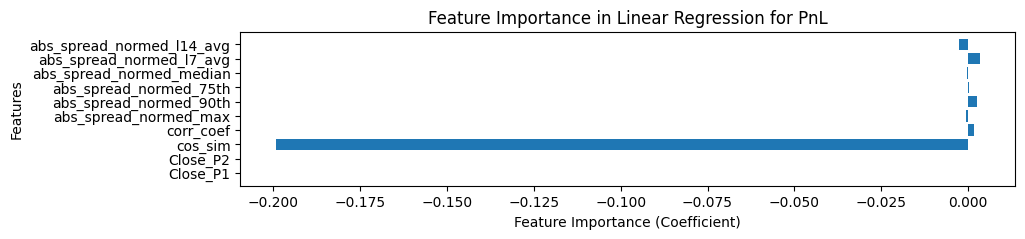

In [10]:
coefficients = model.coef_
# Plot feature importances
plt.figure(figsize=(10,2))
plt.barh(features_names, coefficients)
plt.xlabel("Feature Importance (Coefficient)")
plt.ylabel("Features")
plt.title("Feature Importance in Linear Regression for PnL")
plt.show()